In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Spotify 2010 - 2019 Top 100 Songs.xlsx")

In [3]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [6]:
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


In [7]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type


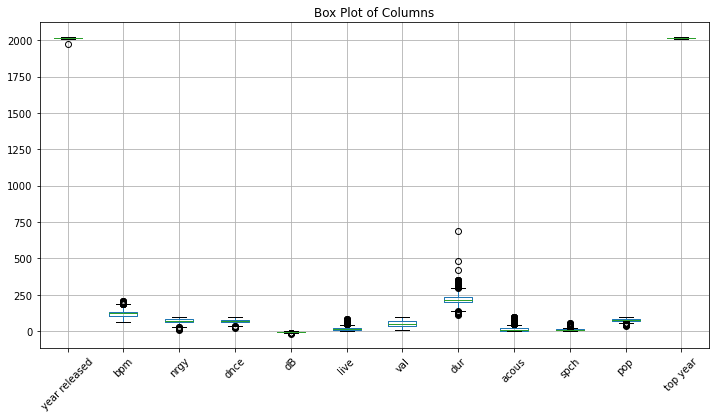

In [9]:
columns_to_check = ["year released", "bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "pop", "top year"]

plt.figure(figsize=(12, 6))
df[columns_to_check].boxplot()
plt.title("Box Plot of Columns")
plt.xticks(rotation=45)
plt.show()


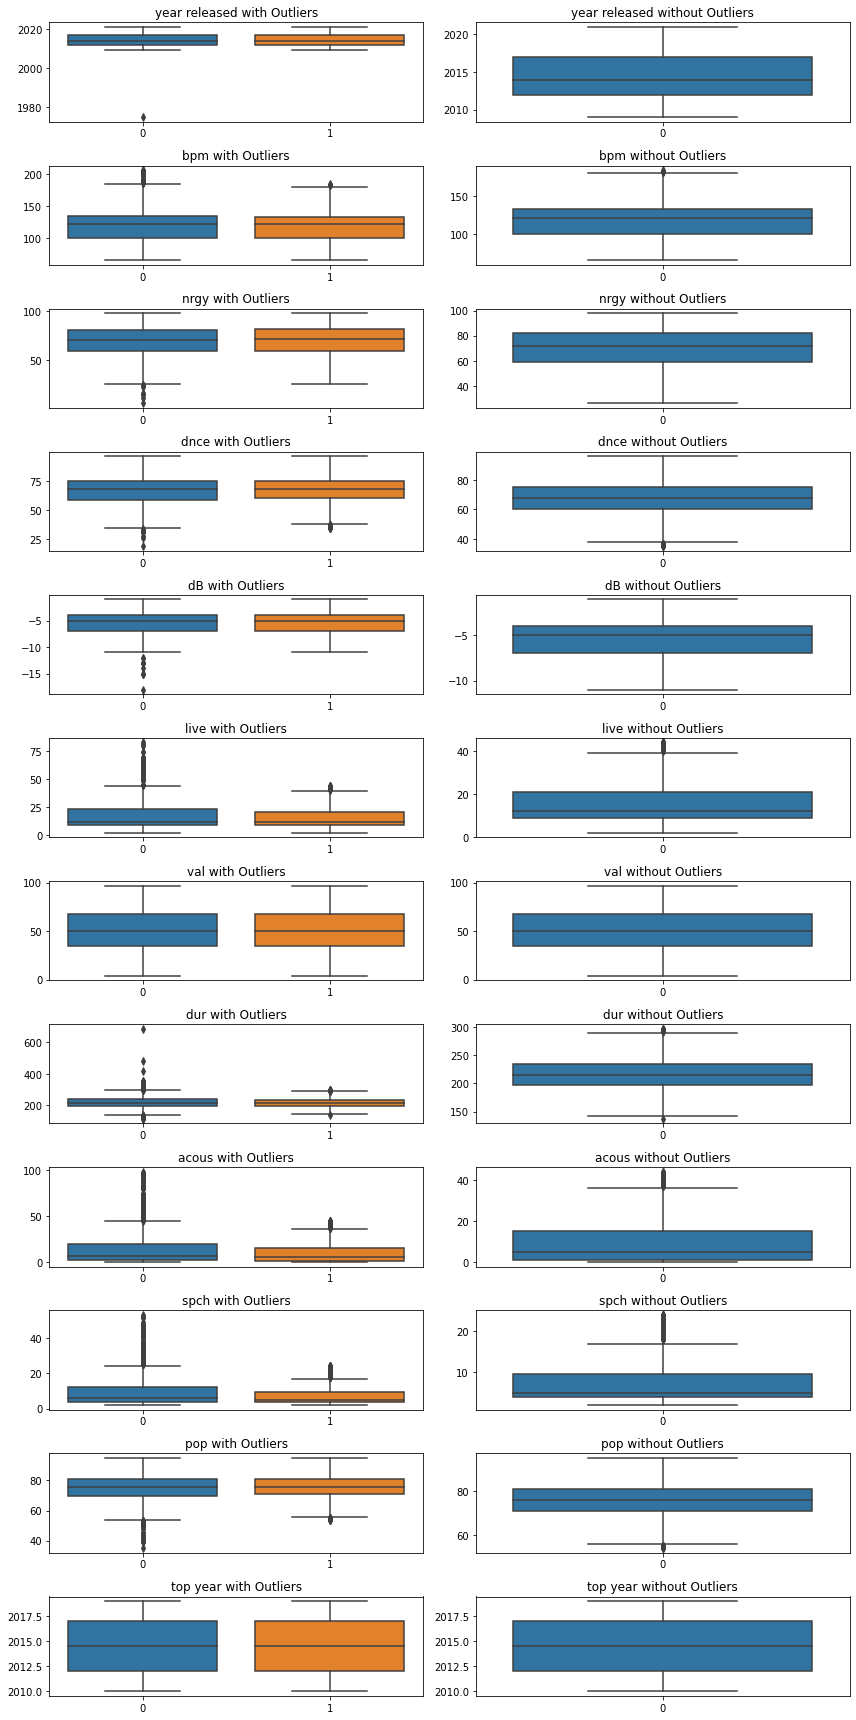

In [10]:
columns_to_check = ["year released", "bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "pop", "top year"]

threshold = 1.5

fig, axes = plt.subplots(nrows=len(columns_to_check), ncols=2, figsize=(12, 24))

for i, column in enumerate(columns_to_check):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    sns.boxplot(data=[df[column], df_no_outliers[column]], ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} with Outliers')
    sns.boxplot(data=df_no_outliers[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} without Outliers')

plt.tight_layout()
plt.show()


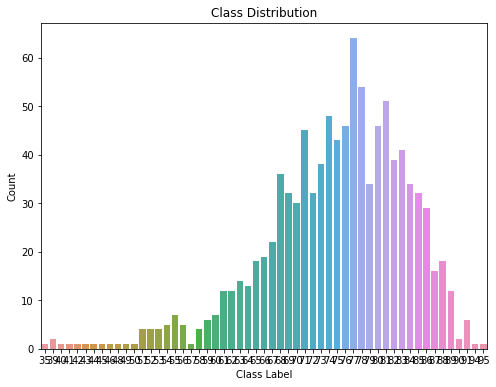

In [11]:
class_counts = df['pop'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [12]:
exclude_columns = ["title","artist"]


column_names = [col for col in df.columns if col not in exclude_columns]
print("Units of measurements:\n ")
for column in column_names:
    print(column)


Units of measurements:
 
top genre
year released
added
bpm
nrgy
dnce
dB
live
val
dur
acous
spch
pop
top year
artist type


In [13]:
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               year released       bpm      nrgy      dnce        dB  \
year released       1.000000 -0.017916 -0.237744  0.222459 -0.116566   
bpm                -0.017916  1.000000  0.118557 -0.111660  0.089568   
nrgy               -0.237744  0.118557  1.000000 -0.129279  0.713428   
dnce                0.222459 -0.111660 -0.129279  1.000000 -0.040538   
dB                 -0.116566  0.089568  0.713428 -0.040538  1.000000   
live               -0.115106  0.014672  0.184094 -0.113324  0.128134   
val                -0.091306  0.021128  0.372866  0.264781  0.317128   
dur                -0.248134 -0.016536 -0.049662 -0.168483 -0.082541   
acous               0.151539 -0.124614 -0.504083 -0.075999 -0.392393   
spch                0.149373  0.149368 -0.099790  0.161734 -0.165838   
pop                 0.182793 -0.025058 -0.234011  0.093176 -0.145403   
top year            0.854339 -0.016887 -0.302535  0.218019 -0.173286   

                   live       val       dur

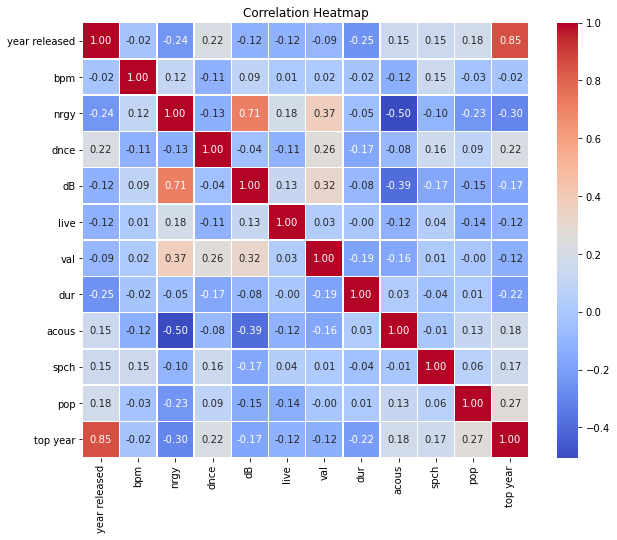

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
genre_popularity = df.groupby('top genre')['pop'].mean().reset_index()

genre_popularity_sorted = genre_popularity.sort_values(by='pop', ascending=False)

print("Most Popular Music Genres (Ordered by Popularity):")
print(genre_popularity_sorted)


Most Popular Music Genres (Ordered by Popularity):
            top genre   pop
42          chill pop  94.0
54      dark clubbing  89.0
26        bedroom pop  88.0
20   australian psych  88.0
60            dfw rap  84.3
..                ...   ...
52     dancefloor dnb  49.0
104            lilith  46.0
70      electro house  45.0
55   deep disco house  44.0
65        dutch house  42.0

[132 rows x 2 columns]


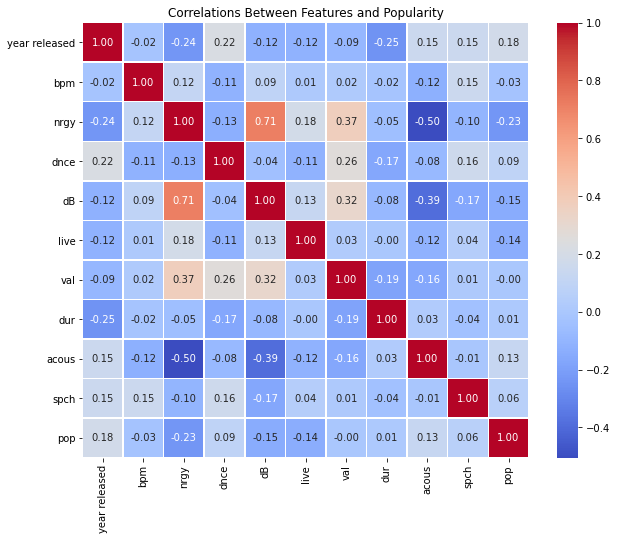

In [16]:
feature_columns = ["year released", "bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch"]

correlations = df[feature_columns + ["pop"]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlations Between Features and Popularity")
plt.show()


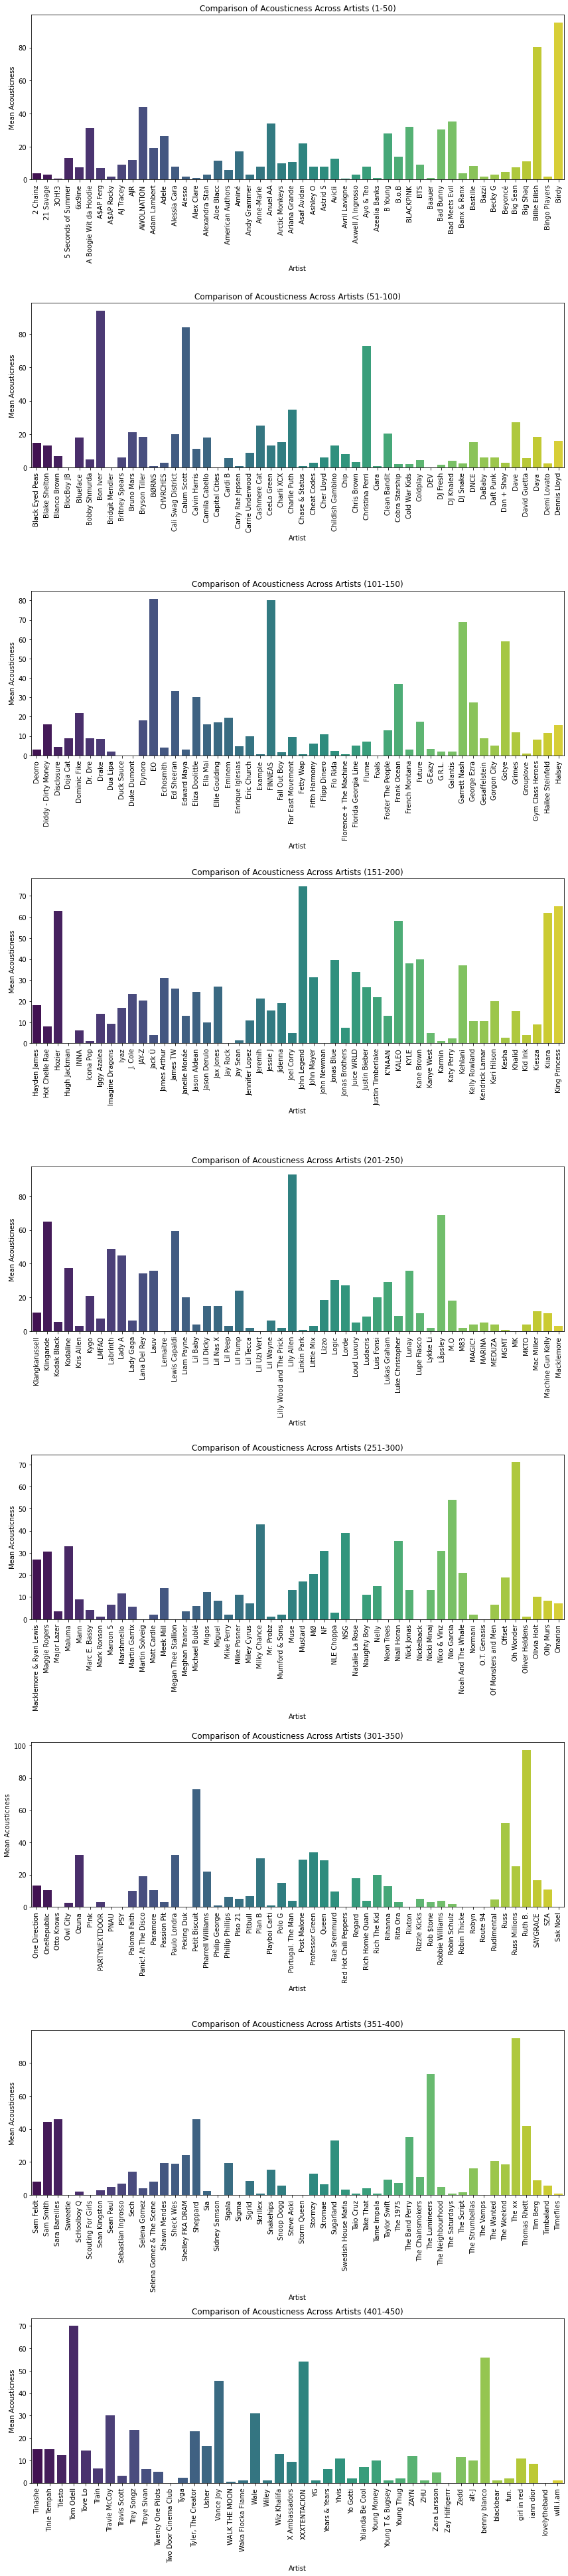

In [17]:
artist_groups = df.groupby('artist')
mean_acousticness = artist_groups['acous'].mean().reset_index()
num_artists_per_graph =50
num_subplots = len(mean_acousticness) // num_artists_per_graph + 1
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, num_subplots * 6))
for i, ax in enumerate(axes):
    start_idx = i * num_artists_per_graph
    end_idx = (i + 1) * num_artists_per_graph
    subset = mean_acousticness[start_idx:end_idx]

    sns.barplot(data=subset, x='artist', y='acous', palette='viridis', ax=ax)
    ax.set_xlabel('Artist')
    ax.set_ylabel('Mean Acousticness')
    ax.set_title(f'Comparison of Acousticness Across Artists ({start_idx+1}-{end_idx})')
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

# Show the subplots
plt.show()


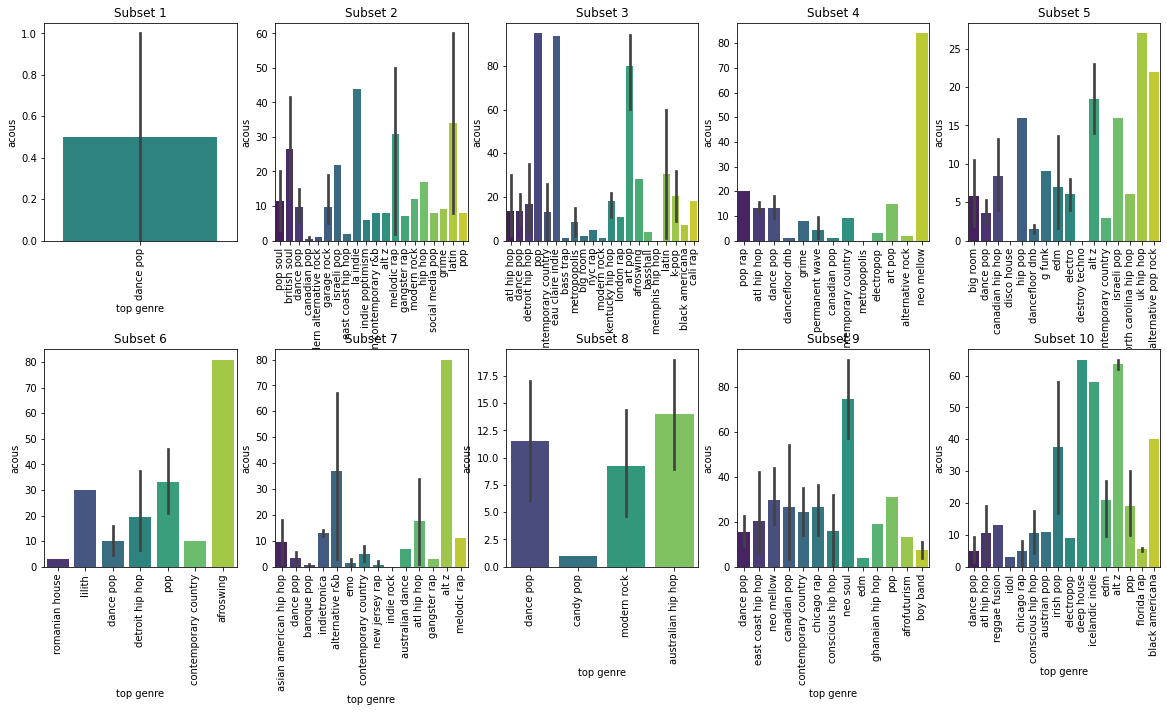

In [18]:
unique_first_letters = df['artist'].str[0].unique()
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  
for i, letter in enumerate(unique_first_letters[:10]):
    row, col = i // 5, i % 5  
    subset = df[df['artist'].str.startswith(letter)]
    
    sns.barplot(data=subset, x='top genre', y='acous', palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f'Subset {i + 1}')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90) 

plt.show()


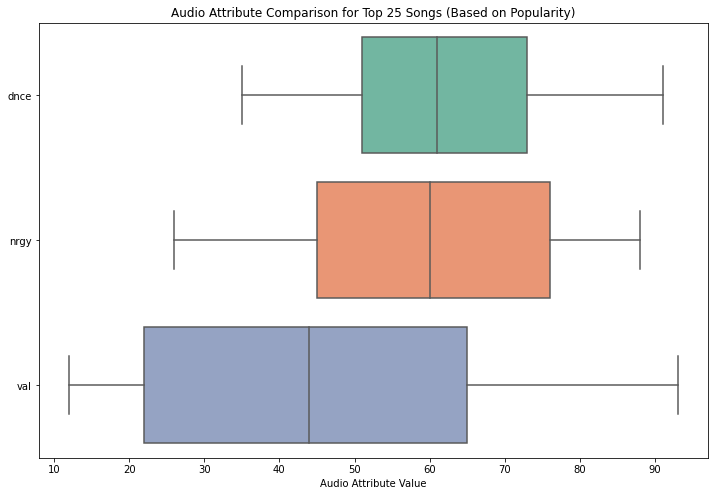

In [19]:
top_25_songs = df.sort_values(by='pop', ascending=False).head(25)

attributes = ["dnce", "nrgy", "val"]

# Create a box plot for each audio attribute for the top 25 songs
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_25_songs[attributes], orient='h', palette='Set2')
plt.xlabel('Audio Attribute Value')
plt.title('Audio Attribute Comparison for Top 25 Songs (Based on Popularity)')
plt.show()


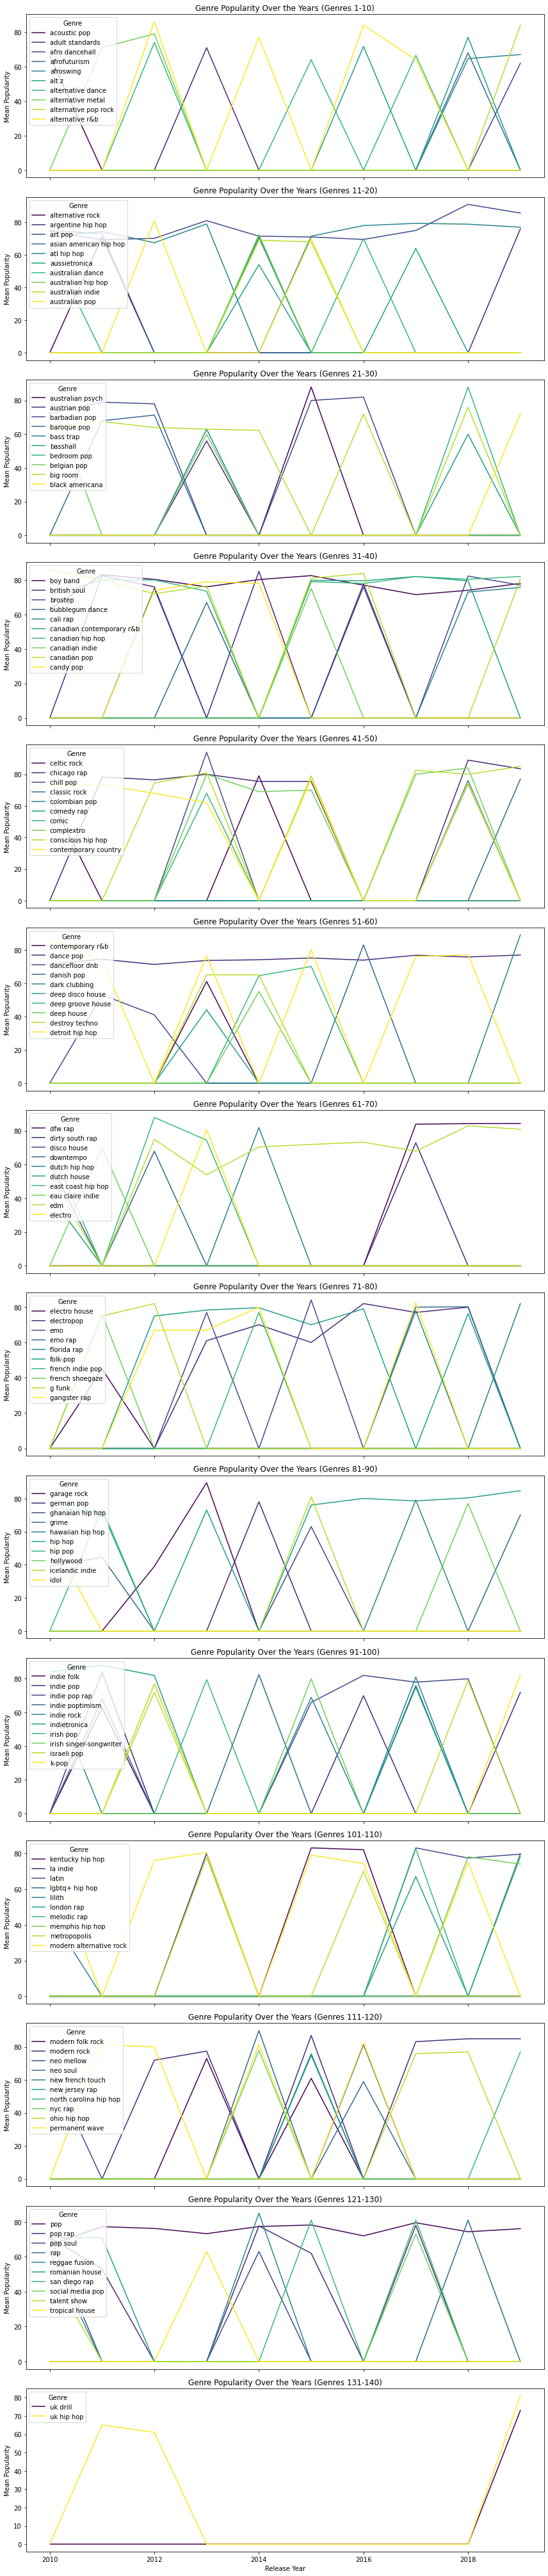

In [20]:
genre_popularity = df.groupby(['top year', 'top genre'])['pop'].mean().unstack(fill_value=0)

num_genres_per_subplot = 10
num_subplots = len(genre_popularity.columns) // num_genres_per_subplot + 1
subplot_height = 4  # Adjust this value as needed
fig_height = subplot_height * num_subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, fig_height), sharex=True)
for i, ax in enumerate(axes):
    start_idx = i * num_genres_per_subplot
    end_idx = (i + 1) * num_genres_per_subplot
    subset = genre_popularity.iloc[:, start_idx:end_idx]

    subset.plot(kind='line', colormap='viridis', ax=ax)
    ax.set_ylabel('Mean Popularity')
    ax.set_title(f'Genre Popularity Over the Years (Genres {start_idx+1}-{end_idx})')
    ax.legend(title='Genre', loc='upper left')
plt.xlabel('Release Year')
plt.tight_layout()
plt.show()


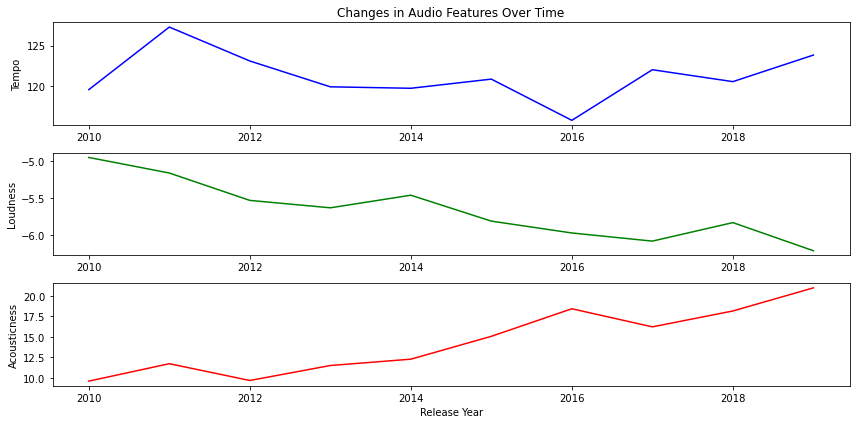

In [21]:

audio_features_over_time = df.groupby('top year')[['bpm', 'dB', 'acous']].mean()
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(audio_features_over_time.index, audio_features_over_time['bpm'], color='blue')
plt.ylabel('Tempo')
plt.title('Changes in Audio Features Over Time')
plt.subplot(3, 1, 2)
plt.plot(audio_features_over_time.index, audio_features_over_time['dB'], color='green')
plt.ylabel('Loudness')
plt.subplot(3, 1, 3)
plt.plot(audio_features_over_time.index, audio_features_over_time['acous'], color='red')
plt.xlabel('Release Year')
plt.ylabel('Acousticness')
plt.tight_layout()
plt.show()


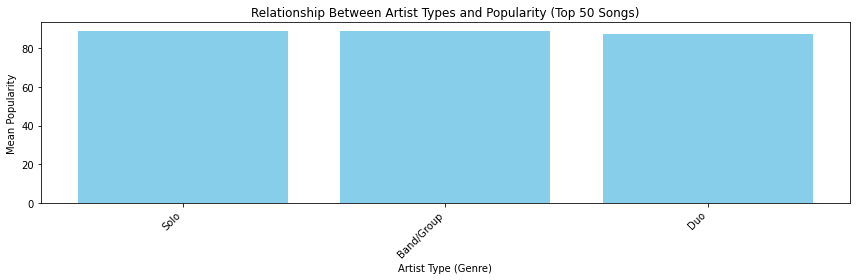

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


top_50_songs = df.nlargest(50, 'pop')
artist_type_popularity = top_50_songs.groupby('artist type')['pop'].mean().reset_index()

sorted_artist_type_popularity = artist_type_popularity.sort_values(by='pop', ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(sorted_artist_type_popularity['artist type'], sorted_artist_type_popularity['pop'], color='skyblue')
plt.xlabel('Artist Type (Genre)')
plt.ylabel('Mean Popularity')
plt.title('Relationship Between Artist Types and Popularity (Top 50 Songs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


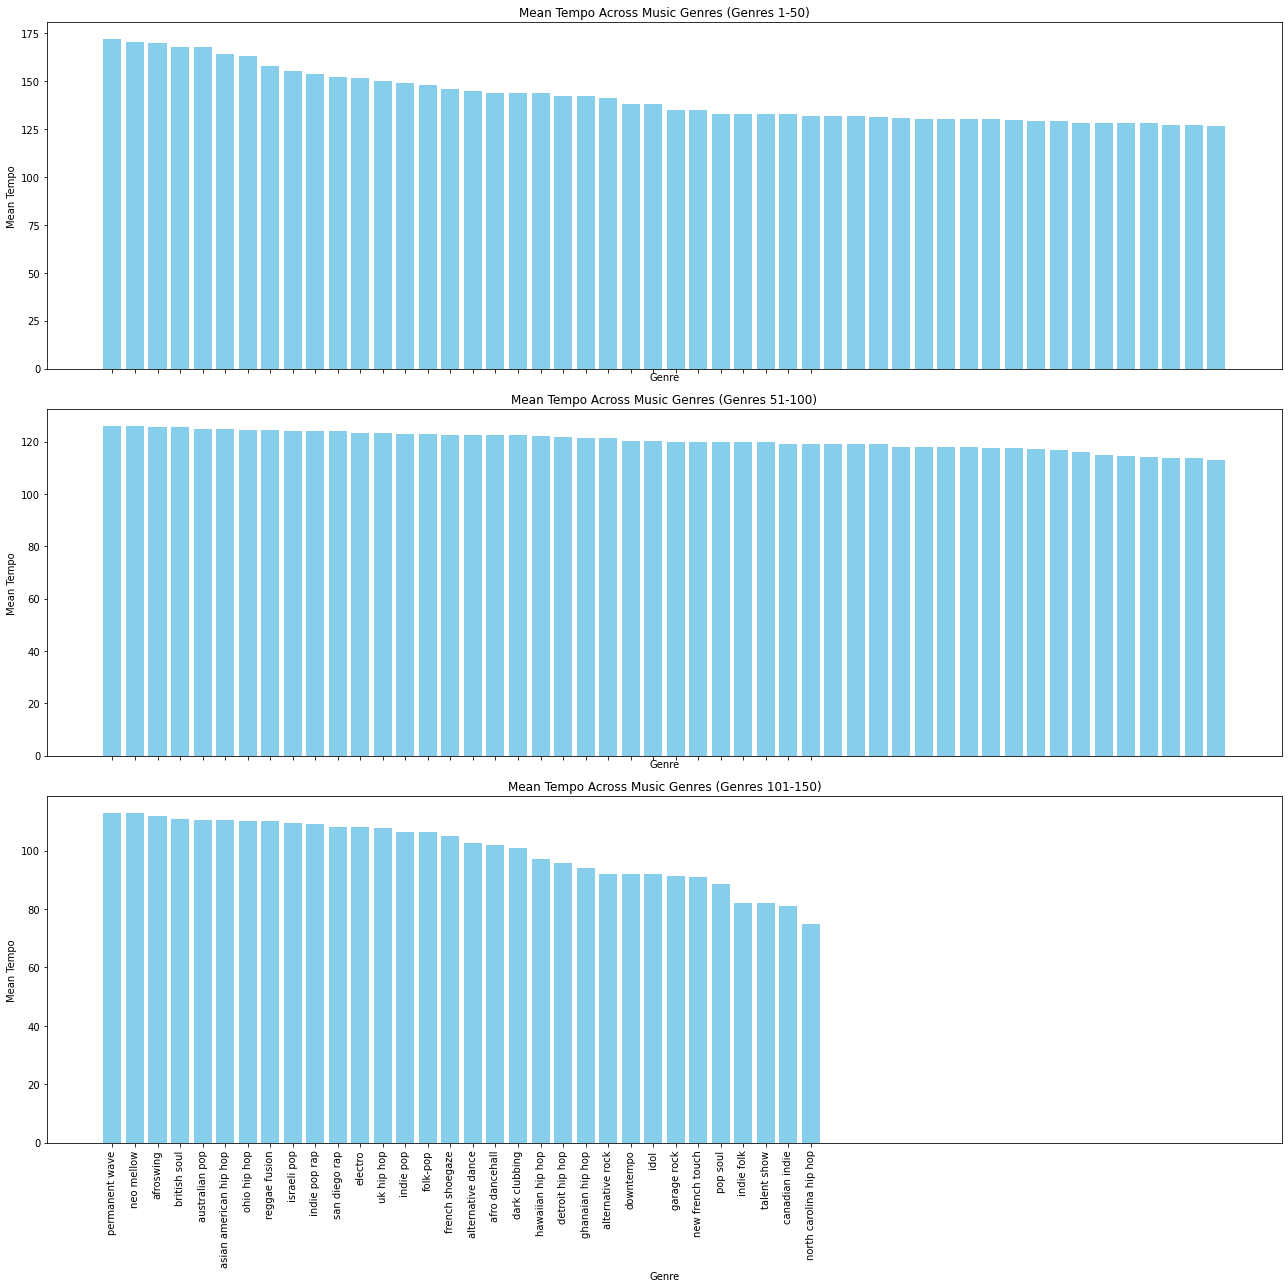

In [23]:
genre_tempo_stats = df.groupby('top genre')['bpm'].agg(['mean', 'median']).reset_index()


sorted_genre_tempo_stats = genre_tempo_stats.sort_values(by='mean', ascending=False)


num_genres_per_subplot = 50
num_subplots = len(sorted_genre_tempo_stats) // num_genres_per_subplot + 1


fig, axes = plt.subplots(num_subplots, 1, figsize=(18, 6 * num_subplots), sharex=True)


for i, ax in enumerate(axes):
    start_idx = i * num_genres_per_subplot
    end_idx = (i + 1) * num_genres_per_subplot
    subset = sorted_genre_tempo_stats.iloc[start_idx:end_idx]

    ax.bar(subset['top genre'], subset['mean'], color='skyblue')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Mean Tempo')
    ax.set_title(f'Mean Tempo Across Music Genres (Genres {start_idx+1}-{end_idx})')
    ax.set_xticks(range(len(subset['top genre'])))  
    ax.set_xticklabels(subset['top genre'], rotation=90) 


plt.tight_layout()

plt.show()
